# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [2]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1693009858536.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,08/24/2023,4376.31,--,4455.16,4458.30,4375.55
1,08/23/2023,4436.01,--,4396.44,4443.18,4396.44
2,08/22/2023,4387.55,--,4415.33,4418.59,4382.77
3,08/21/2023,4399.77,--,4380.28,4407.55,4360.30
4,08/18/2023,4369.71,--,4344.88,4381.82,4335.31
...,...,...,...,...,...,...
2533,08/30/2013,1632.97,--,1638.89,1640.08,1628.05
2534,08/29/2013,1638.17,--,1633.50,1646.41,1630.88
2535,08/28/2013,1634.96,--,1630.25,1641.18,1627.47
2536,08/27/2013,1630.48,--,1652.54,1652.54,1629.05


In [3]:
df.describe()

,Close/Last,Open,High,Low
count,2538.000000,2538.000000,2538.000000,2538.000000
mean,2902.810571,2886.107289,2901.764031,2869.251111
std,886.777550,920.997050,927.547234,914.180523
min,1630.480000,0.000000,0.000000,0.000000
25%,2091.882500,2091.570000,2100.682500,2082.847500
50%,2727.260000,2727.135000,2742.170000,2711.210000
75%,3757.510000,3763.142500,3791.665000,3723.332500
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,2910.651144,2910.186849,2925.974219,2893.190036
std,886.210316,886.121641,892.557146,879.439650
min,1630.480000,1630.250000,1640.080000,1627.470000
25%,2096.990000,2096.560000,2103.470000,2085.670000
50%,2733.290000,2733.270000,2746.800000,2717.450000
75%,3768.470000,3766.980000,3802.580000,3730.210000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2537
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Volume      2517 non-null   object 
 3   Open        2517 non-null   float64
 4   High        2517 non-null   float64
 5   Low         2517 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.6+ KB


In [6]:
df.shape

(2517, 6)

In [7]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

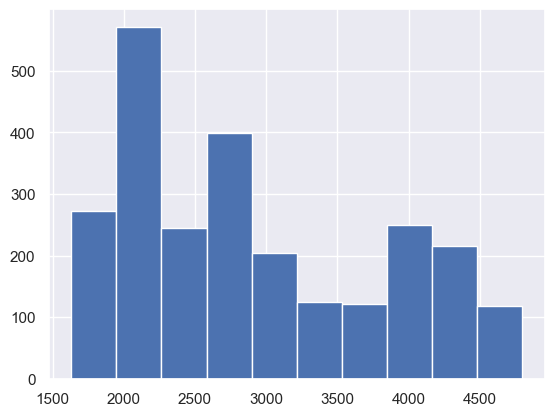

In [8]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [9]:
close_current = df['Close/Last'].iloc[0]
close_current

4376.31

In [10]:
close_mean = df['Close/Last'].mean()
close_mean

2910.651144219317

In [11]:
close_sd = df['Close/Last'].std()
close_sd

886.2103157741191

In [12]:
sigma1 = close_mean + close_sd
sigma1

3796.861459993436

In [13]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4683.071775767555

In [14]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5126.176933654615

In [15]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2537
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [16]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2013-08-26 to 2023-08-24')

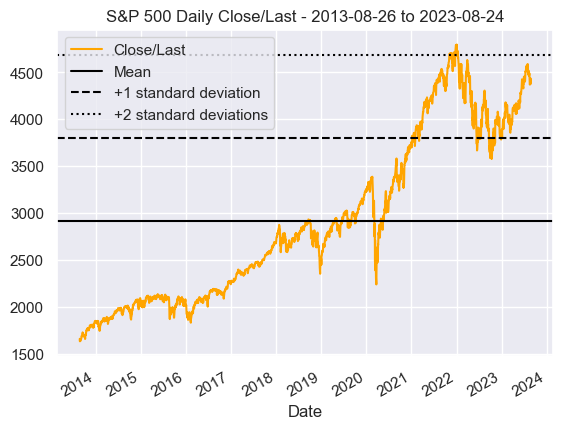

In [17]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2013-08-26 to 2023-08-24')

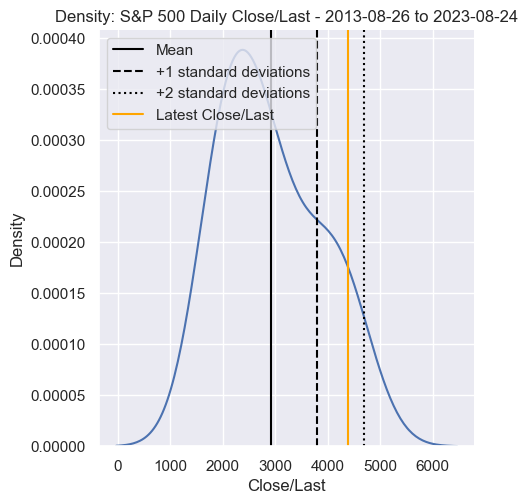

In [18]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [19]:
z_score = (close_current - close_mean)/close_sd
z_score

1.6538499154124682

In [20]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results